In [1]:
import requests, json
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Build data source statistics
data_sources = []
seasons = ['2016-17','2017-18','2018-19','2019-20','2020-21']
tables = ['merged_gw.csv','players_raw.csv']

In [ ]:
# Iterate through tables
# 2021-09-28: manually cleaned up 39 - 47 Game week numers in 2019-20 season file for data errors
for s in seasons:
    for t in tables:
        file_name = s+"_"+t
        df = pd.read_csv(file_name, header = 0,delimiter = ",",encoding = "ISO-8859-1")
        file_summary = [file_name, len(df),len(df.columns),",".join(col for col in df)]
        data_sources.append(file_summary)

In [ ]:
#Generate data columns
list_df = []
for ds in data_sources:
    columns = ds[3].split(",")
    columns.sort()
    columns.insert(0,ds[0])
    list_df.append(columns)
df1 = pd.DataFrame(list_df)

In [ ]:
df1.to_csv("data_columns.csv",index = False)

### EDA Collect Player Data

In [ ]:
#read all players data and merge
df_p_all = pd.DataFrame(columns  = ['season','id','chance_of_playing_next_round', 'chance_of_playing_this_round', 'element_type'])
for s in seasons: 
    pf_name = s+"_"+"players_raw.csv"
    df_p = pd.read_csv(pf_name, header = 0,delimiter = ",",encoding = "ISO-8859-1")
    df_p = df_p[['id','chance_of_playing_next_round', 'chance_of_playing_this_round', 'element_type']]
    df_p['season'] = s
    print(df_p.shape)
    df_p_all = df_p_all.append(df_p,ignore_index=True)

In [ ]:
df_p_all['chance_of_playing_this_round'].describe()

In [ ]:
df_p_all['chance_of_playing_this_round'].value_counts(normalize= True,sort = True) 

### EDA Group by Week-player and summary statistics

In [ ]:
df_gw_all = pd.DataFrame(columns  = ['season','GW', 'element', 'name', 'minutes', 'value', 'selected', 'transfers_balance', 'transfers_in', 'transfers_out', 'bonus', 'total_points', 'influence', 'creativity', 'threat', 'ict_index', 'red_cards', 'yellow_cards', 'assists', 'goals_scored', 'clean_sheets', 'was_home'])
for s in seasons: 
    pf_name = s+"_"+"merged_gw.csv"
    df_gw = pd.read_csv(pf_name, header = 0,delimiter = ",",encoding = "ISO-8859-1")
    df_gw = df_gw[['GW', 'element', 'name', 'minutes', 'value', 'selected', 'transfers_balance', 'transfers_in', 'transfers_out', 'bonus', 'total_points', 'influence', 'creativity', 'threat', 'ict_index', 'red_cards', 'yellow_cards', 'assists', 'goals_scored', 'clean_sheets', 'was_home']]
    df_gw['season'] = s
    print(df_gw.shape)
    df_gw_all = df_gw_all.append(df_gw,ignore_index=True)

In [ ]:
a = np.array(df_gw_all['GW'])
np.unique(a)

In [ ]:
df_gw_all.to_csv("df_gw_all.csv",index = False,encoding = "ISO-8859-1")

In [ ]:
df_gw_all[['influence', 'creativity', 'threat']].describe()

In [ ]:
df_gw_all['was_home'].value_counts(normalize= True,sort = False) 

In [ ]:
bins = [0,10,20,30,40,50,60,70,80,90]
df_gw_all['minutes_binned']= pd.cut(df_gw_all['minutes'],bins)
df_gw_all["minutes_binned"].value_counts(normalize= True,sort = False) 

In [ ]:
bins = [0,500,1000,5000,10000,50000,100000,5000000]
df_gw_all['selected_binned']= pd.cut(df_gw_all['selected'],bins)
df_gw_all["selected_binned"].value_counts(normalize= True,sort = False) 

### EDA Data visualization

In [ ]:
# value of players across seasons
# https://stackabuse.com/matplotlib-box-plot-tutorial-and-examples/
value_1617 = df_gw_all.loc[df_gw_all['season'] == '2016-17', ['value']]
# value_1617 = value_1617.groupby('element')['value'].mean().reset_index()
value_1718 = df_gw_all.loc[df_gw_all['season'] == '2017-18', ['value']]
value_1819 = df_gw_all.loc[df_gw_all['season'] == '2018-19', ['value']]
value_1920 = df_gw_all.loc[df_gw_all['season'] == '2019-20', ['value']]
value_2021 = df_gw_all.loc[df_gw_all['season'] == '2020-21', ['value']]
values = [value_1617, value_1718, value_1819, value_1920,value_2021]
for value in values:
    value['value'] = value['value'].astype('float')
fig, ax = plt.subplots()
ax.boxplot([value_1617['value'],value_1718['value'],value_1819['value'],value_1920['value'],value_2021['value']])
plt.xticks([1, 2, 3, 4,5], ["2016-17", "2017-18", "2018-19", "2019-20","2020-21"], rotation=10)
plt.savefig("value_boxplot.png") # must be before show
plt.show()

In [ ]:
# transfer-in & out across all seasons
transfer_all = df_gw_all[[ 'transfers_in', 'transfers_out']]
for c in transfer_all.columns:
    transfer_all[c] = transfer_all[c].astype('int')
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False,style='plain')
plt.scatter(transfer_all['transfers_in'], transfer_all['transfers_out'],s=2)
plt.xlabel('transfers_in')
plt.ylabel('transfers_out')
plt.savefig("transfer_scatter.png")
plt.show()

In [ ]:
# transfer balance of game week trades across seasons

tb_1617 = df_gw_all.loc[df_gw_all['season'] == '2016-17', ['transfers_balance']]
# value_1617 = value_1617.groupby('element')['value'].mean().reset_index()
tb_1718 = df_gw_all.loc[df_gw_all['season'] == '2017-18', ['transfers_balance']]
tb_1819 = df_gw_all.loc[df_gw_all['season'] == '2018-19', ['transfers_balance']]
tb_1920 = df_gw_all.loc[df_gw_all['season'] == '2019-20', ['transfers_balance']]
tb_2021 = df_gw_all.loc[df_gw_all['season'] == '2020-21', ['transfers_balance']]
tbs = [tb_1617, tb_1718, tb_1819, tb_1920,tb_2021]
for tb in tbs:
    tb['transfers_balance'] = tb['transfers_balance'].astype('int')
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False,style='plain')
ax.boxplot([tb_1617['transfers_balance'],tb_1718['transfers_balance'],tb_1819['transfers_balance'],tb_1920['transfers_balance'],tb_2021['transfers_balance']])
plt.xticks([1, 2, 3, 4,5], ["2016-17", "2017-18", "2018-19", "2019-20","2020-21"], rotation=10)
plt.savefig("tb_boxplot.png") # must be before show
plt.show()

In [ ]:
# Total_points by game week across all seasons 
totalpoint_all = df_gw_all.loc[:,'total_points']
totalpoint_all.astype('int32').dtypes
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False,style='plain')
plt.xlim(-5, 30)
plt.hist(totalpoint_all)
plt.xlabel('Total points')
plt.ylabel('Frequency')
plt.savefig("totalpoints_hist.png")
plt.show() 

### Regression Model data Preparation

In [ ]:
# df_p_all collect season and Player ID, df_gw_all collect season+gw+element data 
print(df_gw_all.shape,df_p_all.shape,df_gw_all.columns,df_p_all.columns)

In [ ]:
# join player data with gw data
df_all = pd.merge(df_gw_all, df_p_all,  how='left', left_on=['season','element'], right_on = ['season','id'])
df_all = df_all.drop(columns=['chance_of_playing_next_round','chance_of_playing_this_round','id'])

In [ ]:
#Collect GW 2 - 38 data and add lastGW columns for joining
df_all_nextGW = df_all[['season','GW','element','total_points','minutes']]
df_all_nextGW = df_all_nextGW[df_all_nextGW['GW']>1]
df_all_nextGW['lastGW'] = df_all_nextGW['GW'] - 1
df_all_nextGW.rename(columns={'total_points':'total_points_NW','minutes':'minutes_NW'},inplace=True)
df_all_nextGW = df_all_nextGW[['season','lastGW','element','total_points_NW','minutes_NW']]

In [ ]:
# merge NW points/minutes with GW data
df_all_nw = pd.merge(df_all, df_all_nextGW,  how='right', left_on=['season','element','GW'], right_on = ['season','element','lastGW'])
df_all_nw = df_all_nw.drop(columns=['lastGW'])

In [ ]:
# create new columns to store historical  data, also dropped about 4000 rows of unmathed rows between this and last GW
df_all_nw['total_points_past'] = df_all_nw['total_points']
df_all_nw['minutes_past'] = df_all_nw['minutes']
df_all_nw = df_all_nw.dropna()

In [ ]:
# build this function to calculate points & minutes of previous weeks in the season, not that for elment must use eq() or it will return 0 
def calculate_points(season,gw,player):
    df_temp = df_gw_all[(df_gw_all['season']==season) & (df_gw_all['GW'].astype(int)<int(gw)) & df_gw_all['element'].eq(int(player))][['total_points']]
    df_temp
    return df_temp['total_points'].sum()

def calculate_mins(season,gw,player):
    df_temp = df_gw_all[(df_gw_all['season']==season) & (df_gw_all['GW'].astype(int)<int(gw)) & df_gw_all['element'].eq(int(player))][['minutes']]
    df_temp
    return df_temp['minutes'].sum()

#calculate_points('2016-17',10,77) test with AZP, return 37, which is correct

In [ ]:
#calculating total points an minutes from past. This will take a long time
for i in range(0, df_all_nw.shape[0]):
   # get row contents as series using iloc{] and index position of row
    rowSeries = df_all_nw.iloc[i]
    # collect gameweek,season,player data for functions
    season,gw,player = rowSeries[0],rowSeries[1],rowSeries[2]
    df_all_nw.at[i,'total_points_past'] = calculate_points(season,gw,player)
    df_all_nw.at[i,'minutes_past'] = calculate_mins(season,gw,player)

In [ ]:
df_all_nw.to_csv("Regression_data.csv", index = False)

### Regression Model building

In [2]:
df_all_nw= pd.read_csv("Regression_data.csv",header = 0,delimiter = ",",encoding = "ISO-8859-1")

In [3]:
"""
input variables: 
        'GW', 'minutes', 'value', 'selected', 'transfers_in', 'transfers_out', 'bonus','total_points', 
       'influence', 'creativity', 'threat', 'ict_index',
       'red_cards', 'yellow_cards', 'assists', 'goals_scored', 'clean_sheets','was_home', 'element_type',
       'total_points_past', 'minutes_past'
# output variables:
    total_points_NW
# filters: 
    1. season: seperate training, test, validation sets
    2. minutes_NW: filter out player-gw that does not played in the next round
    3. element_type: no goalkeepers
# drop variables:
    1. element
    2. name
'"""
df_all_nw.shape

(110541, 28)

In [4]:
# filter by minutes_NW and element_type. Shirnk to 37177 rows of data
df_all_nw_model = df_all_nw[(df_all_nw['minutes_NW'] >= 45) & (df_all_nw['element_type'] != 1)]

In [5]:
df_all_nw_model = df_all_nw_model[df_all_nw_model['element_type'] == 4 ]

In [6]:
# import regression models
from sklearn import  linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import statsmodels.api as sm

In [11]:
"""
reference: https://searchengineland.com/heres-how-i-used-python-to-build-a-regression-model-using-an-e-commerce-dataset-326493
1. Reducing x variables with high p value: 'GW', 'minutes', 'selected', 'transfers_out', 'bonus', 'assists', 'goals_scored', 'clean_sheets','red_cards'
"""
Y = df_all_nw_model['total_points_NW']
X = df_all_nw_model[[ 'value', 'transfers_in','total_points', 'influence', 'creativity', 'threat', 'ict_index', 'yellow_cards','was_home','total_points_past', 'minutes_past', 'minutes', 'selected', 'transfers_out', 'assists', 'goals_scored', 'clean_sheets','red_cards']]
#X = df_all_nw_model[[ 'value', 'transfers_in','total_points', 'influence', 'creativity', 'threat', 'ict_index', 'yellow_cards','was_home', 'element_type','total_points_past', 'minutes_past']]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

In [13]:
print('Training Data Count: {}'.format(X_train.shape[0]))
print('Testing Data Count: {}'.format(X_test.shape[0]))

Training Data Count: 3811
Testing Data Count: 953


In [14]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train.astype(float), X_train.astype(float)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        total_points_NW   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     15.83
Date:                Wed, 29 Sep 2021   Prob (F-statistic):           5.44e-48
Time:                        15:17:23   Log-Likelihood:                -10146.
No. Observations:                3811   AIC:                         2.033e+04
Df Residuals:                    3792   BIC:                         2.045e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.9110      0.273      3.336      0.001       0.376       1.446
value                 0.0400      0.004     10.799      0.000       0.033       0.047
transfers_in      -3.773e-07   7.63e-07     -0.495      0.621   -1.87e-06    1.12e-06
total_points         -0.0145      0.091     -0.160      0.873      -0.193       0.164
influence             0.0663      0.066      1.009      0.313      -0.063       0.195
creativity            0.0630      0.063      1.001      0.317      -0.060       0.186
threat                0.0617      0.062      0.991      0.322      -0.060       0.184
ict_index            -0.6441      0.623     -1.034      0.301      -1.866       0.578
yellow_cards         -0.4317      0.227     -1.902      0.057      -0.877       0.013
was_home             -0.1293      0.114     -1.135      0.256      -0.353       0.094
total_points_past     0.0058      0.005      1.232      0.218      -0.003       0.015
minutes_past         -0.0003      0.000     -1.248      0.212      -0.001       0.000
minutes               0.0066      0.003      2.353      0.019       0.001       0.012
selected           7.944e-08   1.36e-07      0.585      0.559   -1.87e-07    3.46e-07
transfers_out      8.371e-07   9.86e-07      0.849      0.396    -1.1e-06    2.77e-06
assists              -0.1555      0.353     -0.440      0.660      -0.848       0.537
goals_scored          0.1770      0.623      0.284      0.776      -1.045       1.399
clean_sheets         -0.0204      0.141     -0.144      0.885      -0.298       0.257
red_cards            -1.4275      3.494     -0.409      0.683      -8.278       5.423
==============================================================================
Omnibus:                      926.616   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1883.944
Skew:                           1.445   Prob(JB):                         0.00
Kurtosis:                       4.875   Cond. No.                     5.66e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

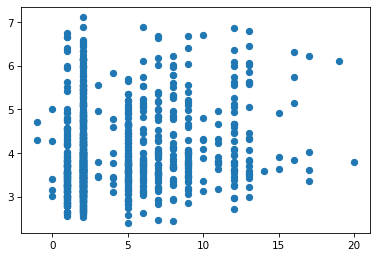

In [17]:
X_test = sm.add_constant(X_test)
y_preds = results.predict(X_test)

plt.figure(dpi = 75)
plt.scatter(y_test, y_preds)
#plt.plot(y_test, y_preds, color="red")
plt.show()

In [ ]:
#https://www.analyticsvidhya.com/blog/2021/02/build-your-first-linear-regression-machine-learning-model/
linreg = linear_model.LinearRegression()
linreg.fit(X, Y)
y_pred = linreg.predict(X)
plt.scatter(y_pred, Y)
##plt.plot(y_pred, Y)
plt.xlabel('y-predict')
plt.ylabel('y-points')
plt.show()

In [ ]:
# R-squared at 0.077
linreg.score(X, Y)

### Polynomial Regression Building

In [ ]:
df_all_nw= pd.read_csv("Regression_data.csv",header = 0,delimiter = ",",encoding = "ISO-8859-1")
# filter by minutes_NW and element_type. Shirnk to 37177 rows of data
df_all_nw_model = df_all_nw[(df_all_nw['minutes_NW'] >= 45) & (df_all_nw['element_type'] != 1)]

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

X = [[0.44, 0.68], [0.99, 0.23]]
vector = [109.85, 155.72]
predict= [[0.49, 0.18]]
#Edit: added second square bracket above to fix the ValueError problem

poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)
predict_ = poly.fit_transform(predict)

clf = linear_model.LinearRegression()
clf.fit(X_, vector)
print clf.predict(predict_)

In [ ]:
Y = df_all_nw_model['total_points_NW']
X = df_all_nw_model[[ 'value', 'transfers_in','total_points', 'influence', 'creativity', 'threat', 'ict_index', 'yellow_cards','was_home', 'element_type','total_points_past', 'minutes_past','GW', 'minutes', 'selected', 'transfers_out', 'bonus', 'assists', 'goals_scored', 'clean_sheets','red_cards']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

In [ ]:
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X_train)
X_test_predict = poly.fit_transform(X_test)
clf = linear_model.LinearRegression()
clf.fit(X_, y_train)
y_test_predict = clf.predict(X_test_predict)

In [ ]:
plt.scatter(y_test_predict, y_test)
##plt.plot(y_pred, Y)
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.xlabel('y-predict')
plt.ylabel('y-points')
plt.show()

### Logistic Regression

In [19]:
df_all_nw.columns

Index(['season', 'GW', 'element', 'name', 'minutes', 'value', 'selected',
       'transfers_balance', 'transfers_in', 'transfers_out', 'bonus',
       'total_points', 'influence', 'creativity', 'threat', 'ict_index',
       'red_cards', 'yellow_cards', 'assists', 'goals_scored', 'clean_sheets',
       'was_home', 'element_type', 'lastGW', 'total_points_NW', 'minutes_NW',
       'total_points_past', 'minutes_past'],
      dtype='object')

In [23]:
#create np percentile function for agg
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n,interpolation = 'midpoint')
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [54]:
# Take data out by season+GW+Element_type, calculate 95th percentile data on total points and points per value
df_ppv_swp=df_all_nw.copy(deep=True)
df_ppv_swp['ppv'] = df_ppv_swp['total_points']/df_ppv_swp['value']
df_ppv_swp = df_ppv_swp.reset_index().groupby(['season','GW','element_type'])['total_points','ppv'].agg({percentile(95)})
df_ppv_swp.columns = [col[0] for col in df_ppv_swp.columns]
df_ppv_swp=df_ppv_swp.rename(columns={"total_points": "tp_95", "ppv": "ppv_95"})
df_ppv_swp = df_ppv_swp.reset_index()
df_ppv_swp['GW-1'] = df_ppv_swp['GW'] - 1

C:\Users\yingy\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
df_ppv_swp

,season,GW,element_type,tp_95,ppv_95,GW-1
0,2016-17,1,1,5.5,0.114444,0
1,2016-17,1,2,5.0,0.111111,0
2,2016-17,1,3,7.5,0.100000,0
3,2016-17,1,4,8.0,0.102597,0
4,2016-17,2,1,7.5,0.167500,1
...,...,...,...,...,...,...
735,2020-21,36,4,7.5,0.141414,35
736,2020-21,37,1,5.0,0.094206,36
737,2020-21,37,2,6.0,0.139535,36
738,2020-21,37,3,6.0,0.114255,36


In [64]:
df_all_nw_95 = pd.merge(df_all_nw, df_ppv_swp,  how='inner', left_on=['season','GW','element_type'], right_on = ['season','GW-1','element_type'])
df_all_nw_95 = df_all_nw_95.drop(columns=['lastGW','GW_y','GW-1'])
df_all_nw_95=df_all_nw_95.rename(columns={"GW_x": "GW"})

In [69]:
df_all_nw_95['tp_95_Y'] = df_all_nw_95['total_points_NW'] >= df_all_nw_95['tp_95'] 
df_all_nw_95['ppv_95_Y'] = (df_all_nw_95['total_points_NW']/df_all_nw_95['value']) >= df_all_nw_95['ppv_95'] 

In [72]:
df_all_nw_95['tp_95_Y'].value_counts()

False    99170
True      7356
Name: tp_95_Y, dtype: int64

In [73]:
df_all_nw_95['ppv_95_Y'].value_counts()

False    100674
True       5852
Name: ppv_95_Y, dtype: int64

In [74]:
df_all_nw_95.columns

Index(['season', 'GW', 'element', 'name', 'minutes', 'value', 'selected',
       'transfers_balance', 'transfers_in', 'transfers_out', 'bonus',
       'total_points', 'influence', 'creativity', 'threat', 'ict_index',
       'red_cards', 'yellow_cards', 'assists', 'goals_scored', 'clean_sheets',
       'was_home', 'element_type', 'total_points_NW', 'minutes_NW',
       'total_points_past', 'minutes_past', 'tp_95', 'ppv_95', 'tp_95_Y',
       'ppv_95_Y'],
      dtype='object')

In [82]:
#https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
Y = df_all_nw_95['ppv_95_Y']
X = df_all_nw_95[[ 'GW', 'element', 'minutes', 'value', 'selected',
       'transfers_balance', 'transfers_in', 'transfers_out', 'bonus',
       'total_points', 'influence', 'creativity', 'threat', 'ict_index',
       'red_cards', 'yellow_cards', 'assists', 'goals_scored', 'clean_sheets',
       'was_home', 'element_type',
       'total_points_past', 'minutes_past']]

In [83]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['ppv_95_Y'])

In [87]:
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['ppv_95_Y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['ppv_95_Y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['ppv_95_Y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['ppv_95_Y']==1])/len(os_data_X))

length of oversampled data is  140988
Number of no subscription in oversampled data 70494
Number of subscription 70494
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [92]:
import statsmodels.api as sm
#removed transfer columns (3) and minutes_past as their p-value is > 0.05
cols=[ 'GW', 'element', 'minutes', 'value', 'selected', 'bonus',
       'total_points', 'influence', 'creativity', 'threat', 'ict_index',
       'red_cards', 'yellow_cards', 'assists', 'goals_scored', 'clean_sheets',
       'was_home', 'element_type',
       'total_points_past'] 
X1=os_data_X[cols]
logit_model=sm.Logit(os_data_y.astype(float),X1.astype(float))
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.471284
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               ppv_95_Y   No. Observations:               140988
Model:                          Logit   Df Residuals:                   140969
Method:                           MLE   Df Model:                           18
Date:                Wed, 29 Sep 2021   Pseudo R-squ.:                  0.3201
Time:                        17:12:52   Log-Likelihood:                -66445.
converged:                       True   LL-Null:                       -97725.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
GW                   -0.0323      0.001    -37.887      0.000      -0.034      -0.031
element 

In [93]:
#rebuild the model, this time using the previously selected features
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
Y = df_all_nw_95['ppv_95_Y']
X = df_all_nw_95[[ 'GW', 'element', 'minutes', 'value', 'selected', 'bonus',
       'total_points', 'influence', 'creativity', 'threat', 'ict_index',
       'red_cards', 'yellow_cards', 'assists', 'goals_scored', 'clean_sheets',
       'was_home', 'element_type',
       'total_points_past']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


In [94]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[30144    36]
 [ 1774     4]]


In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.94      1.00      0.97     30180
        True       0.10      0.00      0.00      1778

    accuracy                           0.94     31958
   macro avg       0.52      0.50      0.49     31958
weighted avg       0.90      0.94      0.92     31958



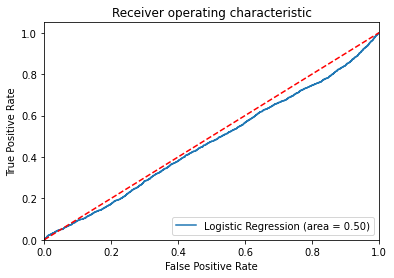

In [96]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [114]:
y_pred.values.reshape(-1, 1)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [115]:
np_xy_testpreduct = np.concatenate((X_test, y_test.values.reshape(-1, 1),y_pred.reshape(-1, 1)), axis=1)

In [119]:
X_test.columns

Index(['GW', 'element', 'minutes', 'value', 'selected', 'bonus',
       'total_points', 'influence', 'creativity', 'threat', 'ict_index',
       'red_cards', 'yellow_cards', 'assists', 'goals_scored', 'clean_sheets',
       'was_home', 'element_type', 'total_points_past'],
      dtype='object')

In [123]:
df = pd.DataFrame(np_xy_testpreduct)

In [125]:
df.columns =['GW', 'element', 'minutes', 'value', 'selected', 'bonus',
       'total_points', 'influence', 'creativity', 'threat', 'ict_index',
       'red_cards', 'yellow_cards', 'assists', 'goals_scored', 'clean_sheets',
       'was_home', 'element_type', 'total_points_past','y-test','y-predict']

In [142]:
df.to_excel("logistic_regression_testresult.xlsx",index = False)

### Data Visualization to Stakeholders

In [145]:
df_all_nw_95.columns

Index(['season', 'GW', 'element', 'name', 'minutes', 'value', 'selected',
       'transfers_balance', 'transfers_in', 'transfers_out', 'bonus',
       'total_points', 'influence', 'creativity', 'threat', 'ict_index',
       'red_cards', 'yellow_cards', 'assists', 'goals_scored', 'clean_sheets',
       'was_home', 'element_type', 'total_points_NW', 'minutes_NW',
       'total_points_past', 'minutes_past', 'tp_95', 'ppv_95', 'tp_95_Y',
       'ppv_95_Y'],
      dtype='object')

In [153]:
df_good = df_all_nw_95[df_all_nw_95['tp_95_Y'] == True]
df_good = df_good[df_good['ppv_95_Y'] == True]

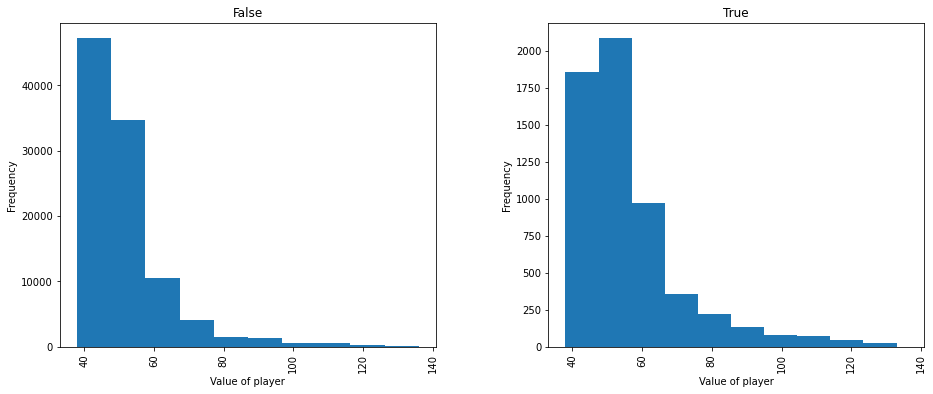

In [192]:
#https://www.dataindependent.com/pandas/pandas-histogram/
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
tp95_value = df_all_nw_95.hist(column='value',by='ppv_95_Y', sharex=True, sharey=False, layout = (2, 2),ax=ax)

for ax in tp95_value.flatten():
    ax.set_xlabel("Value of player")
    ax.set_ylabel("Frequency")
    #ax.set_title("(95th % in Total Points,95th % in Points per Value )")
    #ax.set_suptitle("(95th % in Total Points,95th % in Points per Value )")

fig.savefig('Value_Vs_95thPPV.png')

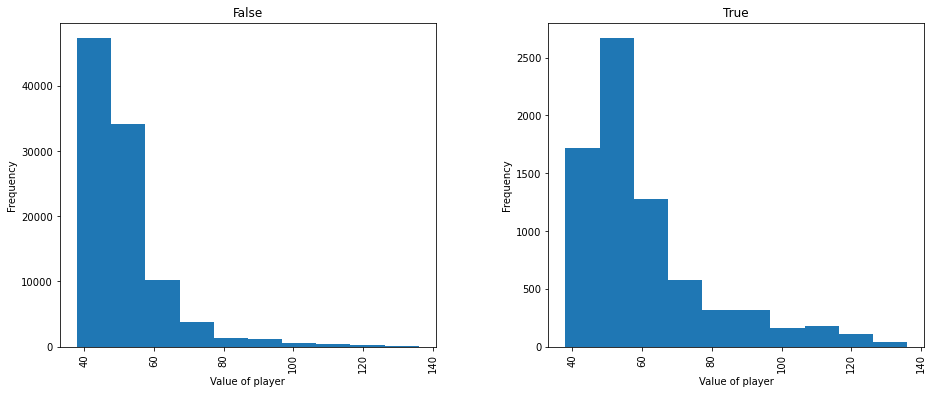

In [193]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
tp95_value = df_all_nw_95.hist(column='value',by='tp_95_Y', sharex=True, sharey=False, layout = (2, 2),ax=ax)

for ax in tp95_value.flatten():
    ax.set_xlabel("Value of player")
    ax.set_ylabel("Frequency")
    #ax.set_title("(95th % in Total Points,95th % in Points per Value )")
    #ax.set_suptitle("(95th % in Total Points,95th % in Points per Value )")

fig.savefig('Value_Vs_95thTP.png')

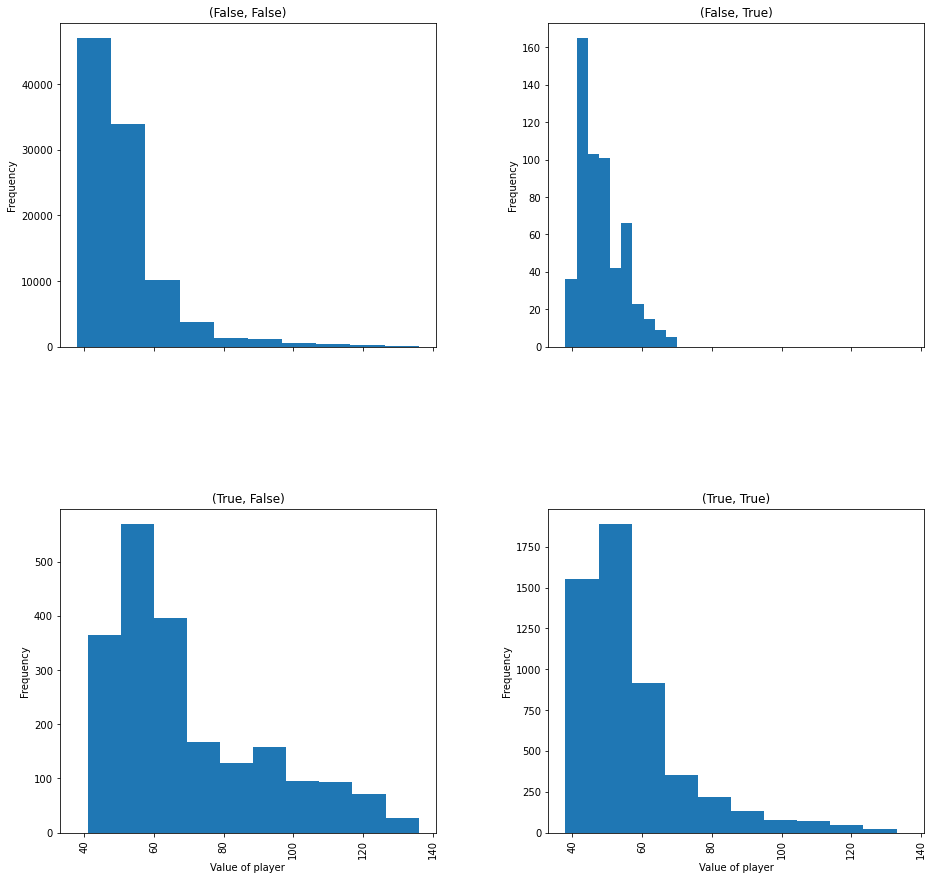

In [183]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
tp95_value = df_all_nw_95.hist(column='value',by=['tp_95_Y','ppv_95_Y'], sharex=True, sharey=False, layout = (2, 2),ax=ax)

for ax in tp95_value.flatten():
    ax.set_xlabel("Value of player")
    ax.set_ylabel("Frequency")
    #ax.set_title("(95th % in Total Points,95th % in Points per Value )")
    #ax.set_suptitle("(95th % in Total Points,95th % in Points per Value )")

fig.savefig('Value_Vs_Performance.png')

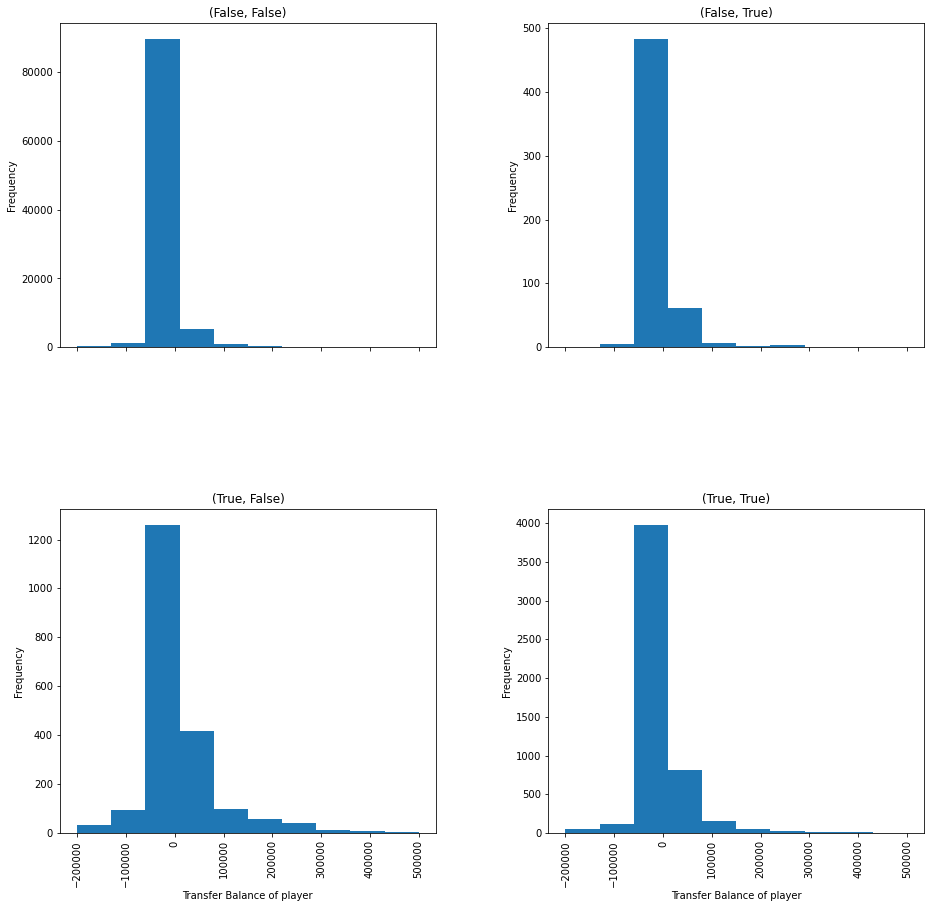

In [191]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
tp95_tb = df_all_nw_95.hist(column='transfers_balance',by=['tp_95_Y','ppv_95_Y'], range=[-200000, 500000],sharex=True, sharey=False, layout = (2, 2),ax=ax)
for ax in tp95_tb.flatten():
    ax.set_xlabel("Transfer Balance of player")
    ax.set_ylabel("Frequency")
    #ax.set_title("(95th % in Total Points,95th % in Points per Value )")
    #ax.set_suptitle("(95th % in Total Points,95th % in Points per Value )")

fig.savefig('TransferBalance_Vs_Performance.png')

In [ ]:
# function to aggregate play stats over the season
def agg_player(x):
        d = []
        d.append(x['GW'].nunique())
        d.append(x['total_points'].max())
        d.append(x['total_points'].min())
        d.append(x['total_points'].mean())
        d.append(x['total_points'].sum())
        d.append(x['minutes'].mean())
        d.append(x['minutes'].sum())
        d.append(x['value'].mean())
        return pd.Series(d, index= ['GW_participated', 'total_points_max','total_points_min','total_points_mean','total_points_sum','minutes_mean','minutes_sum','value_mean'])

In [ ]:
# EDA Group by player and count week
# Get data subset: https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/03_subset_data.html
print (df_1617['element'].nunique())
df_1617_p = df_1617.reset_index()[['name', 'element','bonus', 'loaned_in', 'loaned_out','minutes','opponent_team', 'total_points', 'transfers_balance', 'transfers_in', 'transfers_out','value', 'GW']]
df_1617_p_byname = df_1617_p.groupby(['element','name']).apply(agg_player).reset_index()

In [ ]:
df_1617_p[df_1617_p['element'] == 77]
# a['minutes_sum'].describe()

In [ ]:
### FPL API only contains detailed data for the current season and aggregate data for past seasons, so no use
### Reference: https://medium.com/analytics-vidhya/getting-started-with-fantasy-premier-league-data-56d3b9be8c32
# base url for all FPL API endpoints
base_url = 'https://fantasy.premierleague.com/api/'

# get data from bootstrap-static endpoint
r = requests.get(base_url+'bootstrap-static/').json()

# show the top level fields
pprint(r, indent=2, depth=1, compact=True)

# get player data from 'elements' field
players = r['elements']
events = r['events']
# show data for first player
pprint(events)

base_url = "https://fantasy.premierleague.com/api/"
def get_season_history(player_id):
    '''get all past season info for a given player_id'''
    # send GET request to
    # https://fantasy.premierleague.com/api/element-summary/{PID}/
    r = requests.get(base_url + 'element-summary/' + str(player_id) + '/').json()
    # extract 'history_past' data from response into dataframe
    df = pd.json_normalize(r['history_past'])
    return df

# show player #1's gameweek history
get_season_history(1)[
    [
        'season_name',
        'total_points',
        'minutes',
        'goals_scored',
        'assists'
    ]
].head(10)